In [1]:
from code.dataset import fetch_and_save_data, define_features_targets, load_data, preprocess_data, exploratory_data_analysis, data_split
from code.model import LSTMModel, LSTMClassifier, train_model, train_model_classification, evaluate_model, plot_loss_history, evaluate_model_classification
# from code.strategy import trading_strategy, backtest_strategy
import os

In [ ]:
import importlib
import code.model
importlib.reload(code.model)
from code.model import evaluate_model

[*********************100%%**********************]  1 of 1 completed
Data downloaded and saved.
Data loaded
Data preprocessed


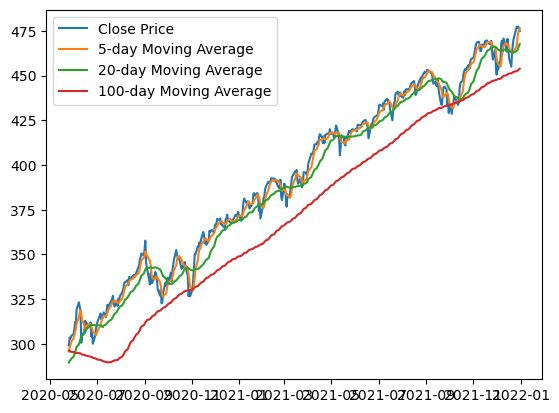

,Open,High,Low,Close,Adj Close,Volume,MA5,MA20,MA100
Date,,,,,,,,,
2020-05-26,301.929993,302.190002,295.459991,299.079987,283.637939,88951400,295.659998,289.583002,296.178002
2020-05-27,302.119995,303.570007,296.869995,303.529999,287.858154,104817400,297.971997,290.473001,295.964602
2020-05-28,304.649994,306.839996,302.239990,302.970001,287.327148,90405200,299.179999,290.961002,295.770202
2020-05-29,302.459991,304.959991,299.470001,304.320007,288.607391,119090800,301.067999,291.653001,295.577002
2020-06-01,303.619995,306.209991,303.059998,305.549988,289.773895,55758300,303.089996,292.791000,295.405201


In [3]:
# Fetch and preprocess Data
ticker = 'SPY'
start = '2020-01-01'
end = '2022-01-01'

filename = f"./datasets/{ticker}_{start}_{end}.csv"

if not os.path.exists(filename):
    fetch_and_save_data(ticker, start, end, filename)
    print("Data downloaded and saved.")
else:
    print("Data already existing in the machine")

raw_data = load_data(filename, start, end)
print("Data loaded")

data = preprocess_data(raw_data)
print("Data preprocessed")

exploratory_data_analysis(data)
data.head()

## Data pre-processing

<b> X has shape</b>: [ N x T x F ]
* N = Number of samples aka number of trading days
* T = Sequence length aka number of time steps
* F = Features

<i>This shape was choosen to be used with an LSTM network. If using a 1D Convoluitonal Neural Network further considerations should be applied.</i>

<b>By index, the features are:</b>

0. Pct_change
1. Volume Z-score
2. MA5 Distance in Z-score 
3. MA20 Distance in Z-score
4. MA100 Distance in Z-score
5. RSI as percentage
6. MACD_Signal_Line as binary
7. Upper Bollinger Band distance from Close in percentage
8. Lower Bollinger Band distance from Close in percentage


In [12]:
X, y = define_features_targets(data, window_size=20)

X_train, X_val, X_test, y_train, y_val, y_test = data_split(X,
                                                            y,
                                                            train_size=0.6,
                                                            val_size=0.2)


Due to Null values 99 rows have been dropped.


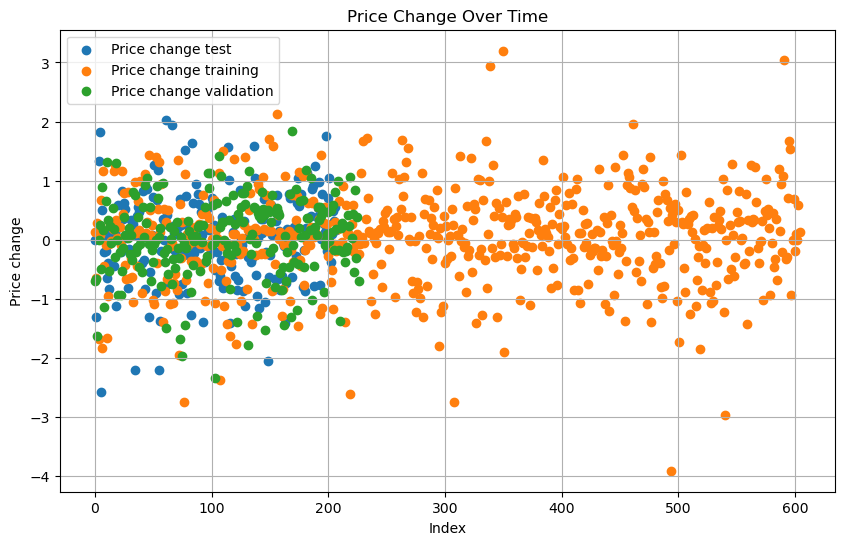

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Price change test')
plt.scatter(range(len(y_train)), y_train, label='Price change training')
plt.scatter(range(len(y_val)), y_val, label='Price change validation')
plt.xlabel('Index')
plt.ylabel('Price change')
plt.title('Price Change Over Time')
plt.legend()
plt.grid(True)
plt.show()

### Model loading


In [ ]:
date_time = '20231004-095101'
model = LSTMModel(input_size=X_train.shape[1],
                  hidden_size=64,
                  num_layers=2,
                  output_size=1)
model = load_model(model, date_time)

In [5]:
### Hyperparameters
input_size = 2 # 9 # X[0][0].shape
hidden_size = 50
output_size = 1
num_layers = 1

model = None
model = LSTMModel(input_size=input_size,
                   hidden_size=hidden_size,
                   num_layers=num_layers,
                   output_size=output_size)

In [9]:

learning_rate= 0.01
num_epochs= 10000
patience= 30
batch_size= 16
weight_decay= 1e-2


### Model training

Plotting loss history at the end of the training

In [10]:
# model = build_model(input_size=X_train.shape[1])

model, loss_history = train_model(model=model,
                                  X_train=X_train,
                                  y_train=y_train,
                                  X_val=X_val,
                                  y_val=y_val,
                                  learning_rate=learning_rate,
                                  num_epochs=num_epochs,
                                  patience=patience,
                                  weight_decay=weight_decay,
                                  batch_size=batch_size)

# plot_loss_history(loss_history)

Epoch [0/10000], Training Loss: 0.8191, Validation Loss: 0.4491
Epoch [1/10000], Training Loss: 0.6958, Validation Loss: 0.4613
Epoch [2/10000], Training Loss: 0.6823, Validation Loss: 0.4459
Epoch [3/10000], Training Loss: 0.6295, Validation Loss: 0.4525
Epoch [4/10000], Training Loss: 0.6381, Validation Loss: 0.4295
Epoch [5/10000], Training Loss: 0.6285, Validation Loss: 0.4358
Epoch [6/10000], Training Loss: 0.6338, Validation Loss: 0.4349
Epoch [7/10000], Training Loss: 0.6437, Validation Loss: 0.4404
Epoch [8/10000], Training Loss: 0.6299, Validation Loss: 0.4291
Epoch [9/10000], Training Loss: 0.6242, Validation Loss: 0.4303
Epoch [10/10000], Training Loss: 0.6250, Validation Loss: 0.4290
Epoch [11/10000], Training Loss: 0.6212, Validation Loss: 0.4273
Epoch [12/10000], Training Loss: 0.6205, Validation Loss: 0.4310
Epoch [13/10000], Training Loss: 0.6213, Validation Loss: 0.4303
Epoch [14/10000], Training Loss: 0.6251, Validation Loss: 0.4308
Epoch [15/10000], Training Loss: 0.

Model Loss on Test Data: 0.5446557998657227
Correlation between y_test and predictions: -0.0758619385329062


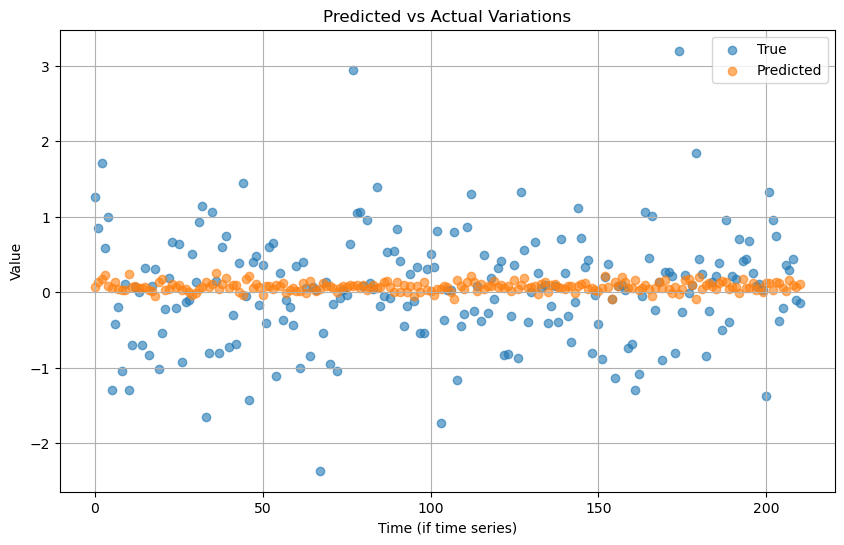

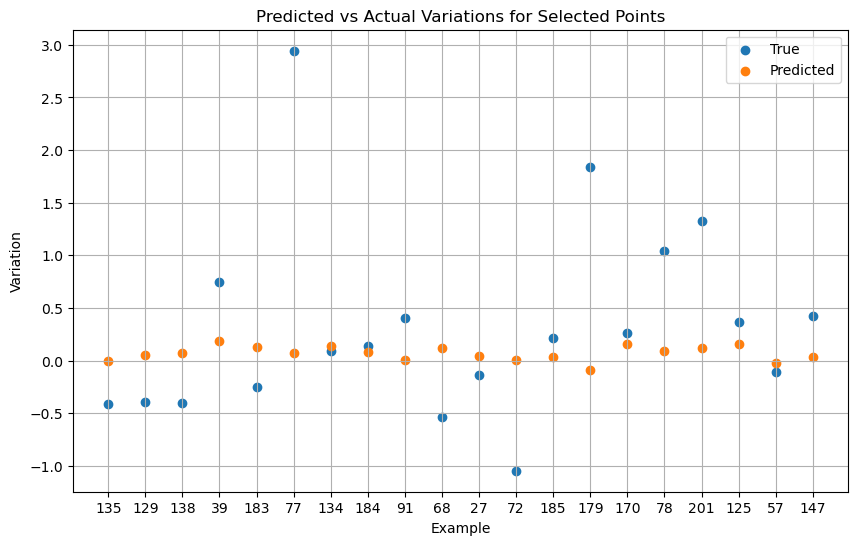

In [11]:
evaluate_model(model, X_test, y_test, n_examples=20)

I tried:
- simple model with layers and ReLu
- LSTM
- boolean data
- single data

Let's try to switch to a classification problem:
* -1 => high loss
*  0 => approximately no variation
* +1 => high gain


In [ ]:
input_size = 5 # 9 # X[0][0].shape
hidden_size = 30
output_size = 3
num_layers = 1 # numbe of features
drop_prob=0.4

model = None
model = LSTMClassifier(input_dim=input_size,
                   hidden_dim=hidden_size,
                   n_layers=num_layers,
                   output_dim=output_size,
                   drop_prob=drop_prob)

In [ ]:
model = model.cuda()


In [ ]:
train_model_classification(model, X_train, y_train, X_val, y_val, epochs=200, batch_size=32, lr=0.007)


In [ ]:

acc = evaluate_model_classification(model, X_test, y_test)

print("Accuracy of the model is ", acc)